In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550485581797)

In [2]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [4]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [5]:
%%time
N = 1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True) # replace는 중복을 허락한다는 의미
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1

Wall time: 1.57 s


In [6]:
np.random.choice(100,100, replace=True)

array([21, 30, 53,  8, 44, 85,  3, 31,  6, 68, 78, 92, 66, 78, 65, 82,  1,
       27, 91, 16, 60, 20, 43,  6, 46, 25, 21, 25, 75, 99, 49, 76, 50, 73,
       35, 62, 29, 37, 48, 69, 70, 68, 67, 23, 35, 87, 33, 95, 99, 42,  2,
       53, 18, 14, 48, 34, 73,  5, 52, 10, 56, 55, 44, 53, 21, 66, 52, 54,
       32, 78, 79, 47, 93, 88, 28, 65, 82,  4, 71, 14, 28, 37, 98, 45, 61,
       43, 61,  7, 81, 15, 82,  4, 94, 31,  9, 88, 40, 68, 10, 69])

In [9]:
r.params

const    -0.820823
X1       40.882507
dtype: float64

#### Bootstrapping
- 회귀분석에 사용한 데이터가 달라진다면 회귀분석의 결과는 어느정도 영향을 받는가?
- 그래서 실시하는 re-sampling방법
- 기존의 N개의 데이터에서 N개를 선택. 단, 중복 허용

##### 1. 우선 100개의 가상데이터 생성

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550485581797)

##### 2. 이 데이터를 기반으로 회귀분석을 실시한다.

In [2]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [4]:
# w0 = -1.628364
# w1 = 42.853356
result.params

const    -1.628364
X1       42.853356
dtype: float64

##### 3. 이번엔 데이터 중복을 허락하여 100개의 가상데이터에서 N개의 데이터를 선택후 다시 회귀분석을 돌린다. 이걸 1000번 반복한다.

In [10]:
N = 1000
params_const = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfX),size=len(dfy), replace=True) #replace : 중복 허락여부
    dfX2 = dfX.iloc[idx,:]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2,dfX2).fit()
    params_const[i] = r.params.const
    params_x1[i] = r.params.X1

##### 4. 이렇게 구한 1000개의 w0와 w1 각각의 분포를 보자.

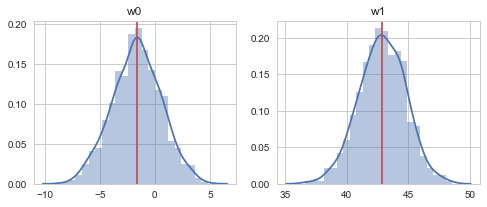

In [13]:
plt.figure(figsize=(8,3))

ax1 = plt.subplot(121)
sns.distplot(params_const, ax=ax1)
plt.axvline(params_const.mean(), c='r')
plt.title("w0")

ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.axvline(params_x1.mean(), c='r')
plt.title("w1")

plt.show()

In [16]:
params_const.mean(), params_const.std() 

(-1.6352947338288748, 2.2040173461453718)

w0의 값의 평균이 -1.6인데 분산이 2.2라
w0값이 0일 가능성을 배제할 수 없다.

In [15]:
params_x1.mean(),params_x1.std()

(42.879415643750136, 1.8824633191169937)

##### 5. StatsModels 보고서로 비교해보자

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.21e-36
Time:                        17:45:46   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4